In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

## EDA

In [2]:
df_items = pd.read_csv('data_set_kaggle/items.csv')

In [3]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
df_items['item_id'].count()

22170

In [5]:
df_categories = pd.read_csv('data_set_kaggle/item_categories.csv')

In [6]:
df_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
x_val = df_categories['item_category_id'].to_numpy()

In [8]:
y_val = df_items['item_category_id'].value_counts().sort_index().to_numpy()

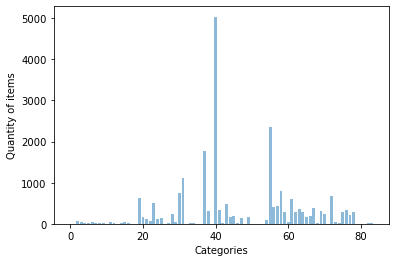

In [9]:
plt.bar(x_val, y_val, align='center', alpha=0.5)
plt.xlabel('Categories')
plt.ylabel('Quantity of items')
plt.show()

In [10]:
df_items['item_category_id'].value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
      ... 
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, Length: 84, dtype: int64

At this point we can conclude that we have an imbalance in the distribution of the quantity of some categories with respect to the quantity of articles

In [11]:
df_shops = pd.read_csv('data_set_kaggle/shops.csv')
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
df_shops['shop_id'].count()

60

In [13]:
df_sales = pd.read_csv('data_set_kaggle/sales_train.csv')
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
df_sales.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [23]:
productSales = df_sales.merge(df_items,how='inner',left_on=['item_id'],right_on=['item_id'])

In [24]:
productSales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [25]:
y = productSales['item_category_id'].value_counts().sort_index().to_numpy()

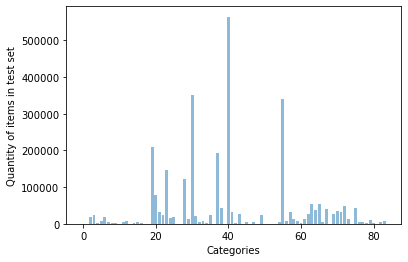

In [27]:
plt.bar(x_val, y, align='center', alpha=0.5)
plt.xlabel('Categories')
plt.ylabel('Quantity of items in test set')
plt.show()

In [28]:
productSales['item_category_id'].value_counts()

40    564652
30    351591
55    339585
19    208219
37    192674
       ...  
0          3
50         2
1          2
10         1
51         1
Name: item_category_id, Length: 84, dtype: int64

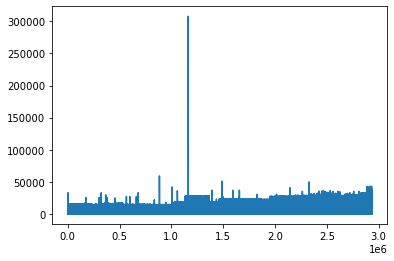

In [29]:
df_sales['item_price'].plot()

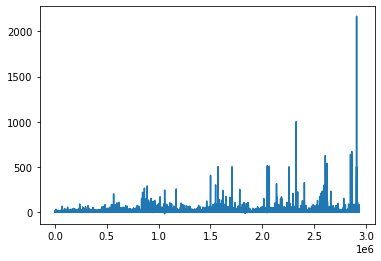

In [32]:
df_sales['item_cnt_day'].plot()

It is important to remove these outliers because they can affect the resoults of the models

In [36]:
df_sales = df_sales[df_sales['item_price'] < 100000]
df_sales = df_sales[df_sales['item_cnt_day'] < 1000]

In [37]:
df_sales.count()

date              2935846
date_block_num    2935846
shop_id           2935846
item_id           2935846
item_price        2935846
item_cnt_day      2935846
dtype: int64

In [50]:
df_test = pd.read_csv('data_set_kaggle/test.csv')
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## Aggregate data

In [42]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# Compute all shop and item combinations
grid = []
for block_num in df_sales['date_block_num'].unique():
    cu_shops = df_sales.loc[df_sales['date_block_num'] == block_num, 'shop_id'].unique()
    cu_items = df_sales.loc[df_sales['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cu_shops, cu_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

In [44]:
grid.head(10)

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0
5,59,2565,0
6,59,2572,0
7,59,2573,0
8,59,2574,0
9,59,2593,0


In [47]:
sales_month = df_sales.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': np.mean}).reset_index()
sales_by_item = sales_month.groupby('item_id').last()
sales_by_item.head()

,date_block_num,shop_id,item_cnt_day,item_price
item_id,,,,
0,20,54,1.0,58.0
1,21,55,1.0,4490.0
2,22,54,1.0,58.0
3,19,54,1.0,58.0
4,20,54,1.0,58.0


In [54]:
def set_price(item_id):
    if item_id in sales_by_item.index:
        return sales_by_item.loc[item_id]['item_price']
    else:
        return sales_by_item['item_price'].median()

In [55]:
month_sales = df_test
month_sales['date_block_num'] = 34
month_sales['item_price'] = month_sales['item_id'].apply(set_price)
month_sales['item_cnt_day'] = 0
month_sales = month_sales.drop(columns=['ID'])

In [56]:
month_sales.head()

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,5,5037,34,1499.0,0
1,5,5320,34,299.0,0
2,5,5233,34,1199.0,0
3,5,5232,34,1199.0,0
4,5,5268,34,299.0,0


In [57]:
sales_month = pd.merge(grid, sales_month, on=['date_block_num','shop_id','item_id'], how='left').fillna(0)
sales_month.rename({'item_cnt_day': 'item_cnt_month'}, axis='columns', inplace=True)
month_sales.rename({'item_cnt_day': 'item_cnt_month'}, axis='columns', inplace=True)
month_sales = month_sales.reindex(columns=sales_month.columns)
month_sales.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price
0,5,5037,34,0,1499.0
1,5,5320,34,0,299.0
2,5,5233,34,0,1199.0
3,5,5232,34,0,1199.0
4,5,5268,34,0,299.0


In [59]:
sales_month = sales_month.append(month_sales)
sales_month.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price
0,59,22154,0,1.0,999.0
1,59,2552,0,0.0,0.0
2,59,2554,0,0.0,0.0
3,59,2555,0,0.0,0.0
4,59,2564,0,0.0,0.0


In [60]:
sales_month = pd.merge(sales_month, df_items, on=['item_id'], how='left')
sales_month.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_name,item_category_id
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59


## Mean encoding

In [61]:
id_types = ['item_id', 'shop_id', 'item_category_id']
encoding_methods = [('item_price', np.mean, 'mean'), ('item_cnt_day', np.sum, 'sum'), ('item_cnt_day', np.mean, 'mean')]
sales_with_item_info = pd.merge(df_sales, df_items, on=['item_id'], how='left')

for id_type in id_types:
    for column_id, agg, agg_type in encoding_methods:
        newDf = sales_with_item_info.groupby([id_type, 'date_block_num']).aggregate(agg).reset_index()[[column_id, id_type, 'date_block_num']]
        newDf.columns = [id_type + '_' + agg_type + '_' + column_id, id_type, 'date_block_num']
        sales_month = pd.merge(sales_month, newDf, on=['date_block_num', id_type], how='left')

In [62]:
sales_month.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_name,item_category_id,item_id_mean_item_price,item_id_sum_item_cnt_day,item_id_mean_item_cnt_day,shop_id_mean_item_price,shop_id_sum_item_cnt_day,shop_id_mean_item_cnt_day,item_category_id_mean_item_price,item_category_id_sum_item_cnt_day,item_category_id_mean_item_cnt_day
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,999.00,18.0,1.0,820.174553,2017.0,1.092041,465.036007,6094.0,1.053414
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58,899.00,0.0,0.0,820.174553,2017.0,1.092041,1401.858108,287.0,0.969595
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58,1709.05,1.0,1.0,820.174553,2017.0,1.092041,1401.858108,287.0,0.969595
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1098.85,2.0,1.0,820.174553,2017.0,1.092041,867.446992,268.0,1.007519
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,327.60,5.0,1.0,820.174553,2017.0,1.092041,443.330014,701.0,0.990113


In [63]:
sales_month.dtypes

shop_id                                 int64
item_id                                 int64
date_block_num                          int64
item_cnt_month                        float64
item_price                            float64
item_name                              object
item_category_id                        int64
item_id_mean_item_price               float64
item_id_sum_item_cnt_day              float64
item_id_mean_item_cnt_day             float64
shop_id_mean_item_price               float64
shop_id_sum_item_cnt_day              float64
shop_id_mean_item_cnt_day             float64
item_category_id_mean_item_price      float64
item_category_id_sum_item_cnt_day     float64
item_category_id_mean_item_cnt_day    float64
dtype: object

## Lag features

In [65]:
lag_features = ['item_id_mean_item_price',
 'item_id_sum_item_cnt_day',
 'item_id_mean_item_cnt_day',
 'shop_id_mean_item_price',
 'shop_id_sum_item_cnt_day',
 'shop_id_mean_item_cnt_day',
 'item_category_id_mean_item_price',
 'item_category_id_sum_item_cnt_day',
 'item_category_id_mean_item_cnt_day',
 'item_cnt_month']
lags = [1, 2, 3, 4, 6, 12]

In [68]:
for lag in lags:
    sales_lags = sales_month.copy()
    sales_lags.date_block_num += lag
    sales_lags = sales_lags[['date_block_num','shop_id','item_id'] + lag_features]
    sales_lags.columns = ['date_block_num','shop_id','item_id'] + [lag_feat + '_' + str(lag) + 'months_ago' for lag_feat in lag_features]
    sales_month = pd.merge(sales_month, sales_lags, on=['date_block_num','shop_id','item_id'], how='left')

In [70]:
for feature in sales_month.columns:
    if 'item_cnt' in feature:
        sales_month[feature] = sales_month[feature].fillna(0)
    elif 'item_price' in feature:
        sales_month[feature] = sales_month[feature].fillna(sales_month[feature].median())

In [73]:
sales_month.head()

,shop_id,item_id,date_block_num,item_cnt_month,item_price,item_name,item_category_id,item_id_mean_item_price,item_id_sum_item_cnt_day,item_id_mean_item_cnt_day,...,item_id_mean_item_price_12months_ago,item_id_sum_item_cnt_day_12months_ago,item_id_mean_item_cnt_day_12months_ago,shop_id_mean_item_price_12months_ago,shop_id_sum_item_cnt_day_12months_ago,shop_id_mean_item_cnt_day_12months_ago,item_category_id_mean_item_price_12months_ago,item_category_id_sum_item_cnt_day_12months_ago,item_category_id_mean_item_cnt_day_12months_ago,item_cnt_month_12months_ago
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,999.00,18.0,1.0,...,299.0,0.0,0.0,813.186002,0.0,0.0,364.058483,0.0,0.0,0.0
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58,899.00,0.0,0.0,...,299.0,0.0,0.0,813.186002,0.0,0.0,364.058483,0.0,0.0,0.0
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58,1709.05,1.0,1.0,...,299.0,0.0,0.0,813.186002,0.0,0.0,364.058483,0.0,0.0,0.0
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,1098.85,2.0,1.0,...,299.0,0.0,0.0,813.186002,0.0,0.0,364.058483,0.0,0.0,0.0
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,327.60,5.0,1.0,...,299.0,0.0,0.0,813.186002,0.0,0.0,364.058483,0.0,0.0,0.0


In [74]:
sales_month.dtypes

shop_id                                              int64
item_id                                              int64
date_block_num                                       int64
item_cnt_month                                     float64
item_price                                         float64
                                                    ...   
shop_id_mean_item_cnt_day_12months_ago             float64
item_category_id_mean_item_price_12months_ago      float64
item_category_id_sum_item_cnt_day_12months_ago     float64
item_category_id_mean_item_cnt_day_12months_ago    float64
item_cnt_month_12months_ago                        float64
Length: 76, dtype: object

Clean sales_month

In [76]:
sales_month = sales_month[sales_month['date_block_num'] > 12]
unused_cols = lag_features[:-1] + ['item_name', 'item_price']

Clipping target values

In [77]:
sales_month['item_cnt_month'] = sales_month['item_cnt_month'].clip(0, 40)

C:\Users\cpadi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Split into training and validation sets

In [79]:
X_train = sales_month[sales_month['date_block_num'] < 33].drop(unused_cols, axis=1)
X_cv = sales_month[sales_month['date_block_num'] == 33].drop(unused_cols, axis=1)
X_test = sales_month[sales_month['date_block_num'] == 34].drop(unused_cols, axis=1)

Save datasets

In [80]:
X_train.to_csv('data_set_kaggle/X_train.csv', index=False)
X_cv.to_csv('data_set_kaggle/X_cv.csv', index=False)
X_test = X_test.reindex(columns=X_cv.columns)
X_test = X_test.drop('item_cnt_month', 1)
X_test.to_csv('data_set_kaggle/X_test.csv', index=False)

In [2]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
X_train = pd.read_csv('X_train.csv')
X_cv = pd.read_csv('X_cv.csv')
X_test_features = pd.read_csv('X_test.csv')

In [8]:
X_train_features = X_train.drop('item_cnt_month', 1)
y_train = X_train['item_cnt_month']
X_cv_features = X_cv.drop('item_cnt_month', 1)
y_cv = X_cv['item_cnt_month']

## Model and hyperparameter tuning

In [6]:
best_3 = []
count = 0
best = None

In [7]:
def train(params):
    global best_3, count
    params['max_depth'] = int(params['max_depth'])

    train_set = xgb.DMatrix(X_train_features, label=y_train)
    validation_set = xgb.DMatrix(X_cv_features, label=y_cv)

    watchlist = [(train_set, 'train'), (validation_set, 'validation')]
    model = xgb.train(params, train_set, 500, evals=watchlist, verbose_eval=True, early_stopping_rounds=50)
    predictions = model.predict(validation_set, ntree_limit=model.best_iteration + 1)
    loss = sqrt(mean_squared_error(y_cv, predictions))
    
    if loss not in [best_model['loss'] for best_model in best_3]:
        best_3.append({ 'model': model, 'loss': loss })
    
    best_3 = sorted(best_3, key=lambda x: x['loss'])[:3]
    count += 1
    
    print(count)
    print("Trained with:")
    print(params)
    print("Loss:")
    print(loss)
    return { 'loss': loss, 'status': STATUS_OK }

In [8]:
seed = 17
def optimize():
    global best
    
    space = {
             'max_depth' : hp.quniform('max_depth', 5, 9, 1),
             'eta' : hp.quniform('eta', 0.07, 0.1, 0.01),
             'gamma' : hp.quniform('gamma', 0.8, 1.1, 0.1),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 4, 1),
             'eval_metric': 'rmse',
             'objective': 'reg:linear',
             'tree_method': 'exact',
             'silent' : 1,
             'seed': seed
             }

    trials = Trials()
    best = fmin(train, space, algo=tpe.suggest, max_evals=15, trials=trials)

    print(best)

In [9]:
optimize()

[18:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516:                   
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:1.40185	validation-rmse:1.37537                                                                         

Multiple eval metrics have been passed: 'validation-rmse' will be used for early stopping.                             


Will train until validation-rmse hasn't improved in 50 rounds.                                                         

[1]	train-rmse:1.35461	validation-rmse:1.34026           

[127]	train-rmse:0.97876	validation-rmse:1.13032                                                                       

[128]	train-rmse:0.97851	validation-rmse:1.13045                                                                       

[129]	train-rmse:0.97784	validation-rmse:1.13047                                                                       

[130]	train-rmse:0.97757	validation-rmse:1.13135                                                                       

[131]	train-rmse:0.97711	validation-rmse:1.13092                                                                       

[132]	train-rmse:0.97669	validation-rmse:1.13084                                                                       

[133]	train-rmse:0.97627	validation-rmse:1.13034                                                                       

[134]	train-rmse:0.97599	validation-rmse:1.13039                                                                       

[135]	train-rmse:0.97570	validat

[104]	train-rmse:1.01886	validation-rmse:1.12966                                                                       

[105]	train-rmse:1.01867	validation-rmse:1.12947                                                                       

[106]	train-rmse:1.01807	validation-rmse:1.12958                                                                       

[107]	train-rmse:1.01793	validation-rmse:1.12955                                                                       

[108]	train-rmse:1.01783	validation-rmse:1.12955                                                                       

[109]	train-rmse:1.01757	validation-rmse:1.12942                                                                       

[110]	train-rmse:1.01722	validation-rmse:1.12913                                                                       

[111]	train-rmse:1.01687	validation-rmse:1.12914                                                                       

[112]	train-rmse:1.01670	validat

[238]	train-rmse:0.98457	validation-rmse:1.12612                                                                       

[239]	train-rmse:0.98445	validation-rmse:1.12611                                                                       

[240]	train-rmse:0.98428	validation-rmse:1.12611                                                                       

[241]	train-rmse:0.98408	validation-rmse:1.12597                                                                       

[242]	train-rmse:0.98403	validation-rmse:1.12596                                                                       

[243]	train-rmse:0.98375	validation-rmse:1.12584                                                                       

[244]	train-rmse:0.98350	validation-rmse:1.12581                                                                       

[245]	train-rmse:0.98336	validation-rmse:1.12571                                                                       

[246]	train-rmse:0.98322	validat

[24]	train-rmse:1.05389	validation-rmse:1.14605                                                                        

[25]	train-rmse:1.05117	validation-rmse:1.14562                                                                        

[26]	train-rmse:1.04832	validation-rmse:1.14430                                                                        

[27]	train-rmse:1.04477	validation-rmse:1.14245                                                                        

[28]	train-rmse:1.04214	validation-rmse:1.14136                                                                        

[29]	train-rmse:1.03994	validation-rmse:1.14102                                                                        

[30]	train-rmse:1.03805	validation-rmse:1.14083                                                                        

[31]	train-rmse:1.03594	validation-rmse:1.14014                                                                        

[32]	train-rmse:1.03405	validati

[158]	train-rmse:0.94551	validation-rmse:1.12844                                                                       

[159]	train-rmse:0.94540	validation-rmse:1.12846                                                                       

[160]	train-rmse:0.94512	validation-rmse:1.12829                                                                       

[161]	train-rmse:0.94486	validation-rmse:1.12818                                                                       

[162]	train-rmse:0.94409	validation-rmse:1.12793                                                                       

[163]	train-rmse:0.94394	validation-rmse:1.12787                                                                       

[164]	train-rmse:0.94367	validation-rmse:1.12874                                                                       

Stopping. Best iteration:                                                                                              
[114]	train-rmse:0.96187	validati

[112]	train-rmse:0.90563	validation-rmse:1.12856                                                                       

[113]	train-rmse:0.90541	validation-rmse:1.12855                                                                       

[114]	train-rmse:0.90511	validation-rmse:1.12861                                                                       

[115]	train-rmse:0.90469	validation-rmse:1.12864                                                                       

[116]	train-rmse:0.90443	validation-rmse:1.12846                                                                       

[117]	train-rmse:0.90418	validation-rmse:1.12852                                                                       

[118]	train-rmse:0.90390	validation-rmse:1.12851                                                                       

[119]	train-rmse:0.90337	validation-rmse:1.12845                                                                       

[120]	train-rmse:0.90274	validat

[109]	train-rmse:0.95001	validation-rmse:1.12618                                                                       

[110]	train-rmse:0.94974	validation-rmse:1.12612                                                                       

[111]	train-rmse:0.94949	validation-rmse:1.12597                                                                       

[112]	train-rmse:0.94911	validation-rmse:1.12622                                                                       

[113]	train-rmse:0.94893	validation-rmse:1.12614                                                                       

[114]	train-rmse:0.94835	validation-rmse:1.12519                                                                       

[115]	train-rmse:0.94814	validation-rmse:1.12512                                                                       

[116]	train-rmse:0.94789	validation-rmse:1.12458                                                                       

[117]	train-rmse:0.94626	validat

KeyboardInterrupt: 

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import gc

In [5]:
#configure to run on gpu
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0],True)

In [52]:
def root_mean_squared_error(y_true, y_pred):
        return tf.sqrt(keras.losses.mean_squared_error(y_true, y_pred)) 
    
def modelNN(X_train):
    model = keras.Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss=root_mean_squared_error, optimizer='adam')
    return model

In [53]:
model = modelNN(X_train_features)

In [54]:
def nn_train(modelNN,X_train, y_train, X_test,y_test=None):
    # Compile model  
    model.compile(loss=root_mean_squared_error, optimizer='adam')
    #Scale the data to spead up the training and increase performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    if y_test is None:
        model.fit(X_train_scaled, y_train, epochs=1, batch_size=64)
    else:
        model.fit(X_train_scaled, y_train, epochs=1, validation_data = (X_test_scaled, y_test), batch_size=64)

    # Predict targets for the test data
    predictions = model.predict(X_test_scaled)

    del X_train_scaled, X_test_scaled
    gc.collect()

    return predictions, model

In [56]:
pred, model = nn_train(model,X_train_features, y_train, X_cv_features, y_cv)

91244/91244 [==============================] - 184s 2ms/step - loss: 0.2518 - val_loss: 0.2371


In [57]:
model.save_weights('weightsnn.h5')

In [10]:
import joblib

In [11]:
joblib.dump(best_3[0], 'model_1')
joblib.dump(best_3[1], 'model_2') 
joblib.dump(best_3[2], 'model_3')

['model_3']

In [58]:
import joblib
import xgboost as xgb
import pandas as pd
X_cv_features = pd.read_csv('X_cv.csv').drop('item_cnt_month', 1)
X_test_features = pd.read_csv('X_test.csv').reindex(columns=X_cv_features.columns)
best_3 = [
    joblib.load('model_1'),
    joblib.load('model_2'),
    joblib.load('model_3'),
]
modelNN = modelNN(X_cv_features)
modelNN = model.load_weights('weightsnn.h5')


[20:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


## Ensembling

In [59]:
def predict_test(model):
    test = xgb.DMatrix(X_test_features)
    return model.predict(test, ntree_limit=model.best_iteration + 1)

In [60]:
first_preds = predict_test(best_3[0]['model'])
second_preds = predict_test(best_3[1]['model'])
third_preds = predict_test(best_3[2]['model'])
fourt_preds = model.predict(X_test_features)
fourt_preds = np.reshape(fourt_preds, (fourt_preds.shape[0],))

In [68]:
import numpy as np
final_preds = np.array([first_preds, second_preds, third_preds,prueba]).mean(axis=0)
subs = pd.read_csv('test.csv')
subs['item_cnt_month'] = final_preds.clip(0, 20)
subs['item_cnt_month'] = subs['item_cnt_month']
submission = subs[['ID', 'item_cnt_month']]

In [69]:
submission.head()

,ID,item_cnt_month
0,0,0.417774
1,1,0.177216
2,2,0.839410
3,3,0.275358
4,4,2.959072


In [70]:
submission.to_csv('subs.csv', index=False)